In [8]:
import sklearn 
from sklearn.model_selection import train_test_split #train / test split
from sklearn.ensemble import RandomForestClassifier #Model 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
from sklearn.metrics import confusion_matrix #Metrics 
from sklearn.model_selection import cross_val_score #Cross-validation
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score #ROC cure 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
#CSV read 
for dirname, _, filenames in os.walk("C:/Users/aleja/OneDrive/Documents/4rt LENGUAS APLICADAS/TFG/dataframe_def.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))     
nRowsRead = None #Número de filas que leerá el programa. Si se quiere leer todo, entonces None
df = pd.read_csv('C:/Users/aleja/OneDrive/Documents/4rt LENGUAS APLICADAS/TFG/dataframe_def.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Dyt-desktop.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 3644 rows and 197 columns


In [3]:
#Train/Test split 
y_axis= df.iloc[:,[-1]]
y= y_axis.to_numpy().flatten()
X_axis= df.drop(y_axis.columns,axis = 1)
X= X_axis.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [6]:
#Random forest 
rf= RandomForestClassifier(n_estimators=200, class_weight='balanced')
rf.fit(X_train, y_train)
rf.predict(X_test)
rf.score(X_test, y_test)
y_pred= rf.predict(X_test)

cm= confusion_matrix(y_test, y_pred)
print(cm)

tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test)).ravel()
recall= float(tp) / (tp + fn)
print('Recall:{}'.format(recall))

[[654   1]
 [ 69   5]]
Recall:0.06756756756756757


In [5]:
#Validation of model 
kf = KFold(n_splits=10, shuffle=True)
scores = [] 
for train_idx, val_idx in kf.split(X):
    X_train_k, y_train_k = X[train_idx], y[train_idx]
    X_val_k, y_val_k = X[val_idx], y[val_idx]
    rf= RandomForestClassifier(n_estimators=200, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_pred_k= rf.predict(X_val_k)
    cm= confusion_matrix(y_val_k, y_pred_k)
    tn, fp, fn, tp = confusion_matrix(y_val_k, y_pred_k).ravel()
    recall= float(tp) / (tp + fn)
    scores.append(recall)

print('Recall mean:{}'.format(np.mean(scores)))

Recall mean:0.6590167914641872


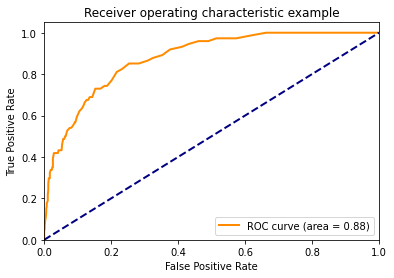

In [9]:
#ROC curve 
y_score= rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, drop_intermediate=True)
roc_auc = auc(fpr, tpr)

#Graphic  
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()